#  The Analysis of Survival in Titanic 

Completed the analyses of surviving dataset for people on Titanic by data mining in the following way:
1. Found out the age, gender, class distribution for passengers on the Titanic.
2. Research on the distribution for deck where passengers were on.
3. Visualized the distribution of the places where passengers come from.
4. Find out the factors that help people survive the sinking.

PART 1: the age, gender, class distribution for passengers on the Titanic.

In [9]:
import pandas as pd
from pandas import Series,DataFrame

# import the dataset downloaded from kaggle
titanic_df = pd.read_csv('/Users/suruisun/Downloads/train.csv')

# a preview of data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


We noticed that there are a lot of missing data in the Cabin field.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Draw a plot for to find the number of male and female in this ship.

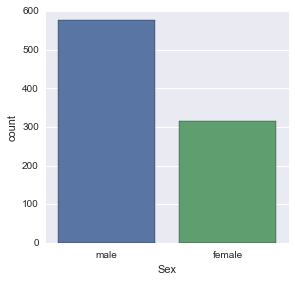

In [12]:
sns.factorplot(x='Sex', data = titanic_df,kind='count')

Then seperate gender by different classes.

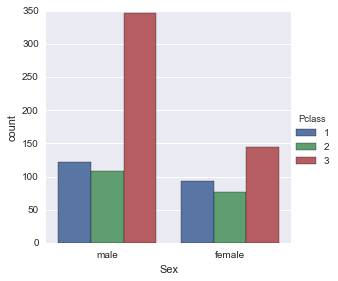

In [13]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

Or seperate class by different gender.

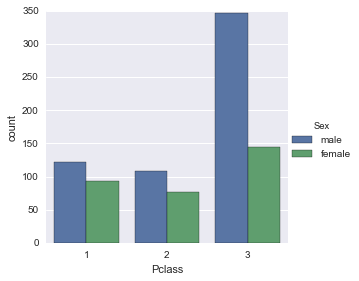

In [14]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

The two plots above showed there are far more male passengers in the 3rd class than other 2 classes.

Treat anyone under 16 as a child, and use the apply technique with a function to create a new column called 'person' to represent different age and gender group.

In [15]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

# define a new column called 'person'
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [16]:
titanic_df[0:10] # to have a preview of the result

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


Make a plot for class seperated by age and gender group. Later we would like to test the famous "Women and children first policy" in this case.

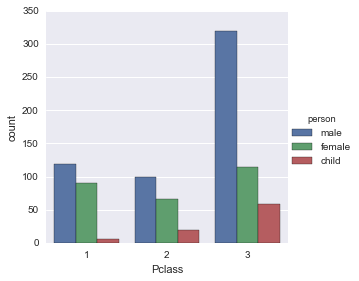

In [17]:
sns.factorplot('Pclass',kind='count',hue='person',data=titanic_df)

Draw a histogram for the distribution of passengers' age on the Titanic.

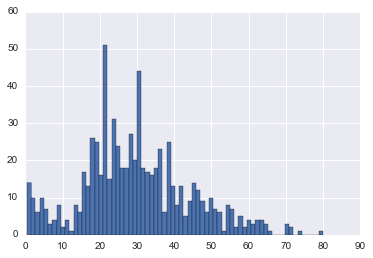

In [18]:
titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean() # the average age for passengers

29.69911764705882

In [20]:
titanic_df['person'].value_counts() # the count of male, female and child

male      537
female    271
child      83
Name: person, dtype: int64

Then draw the kdeplot for age under different genders.

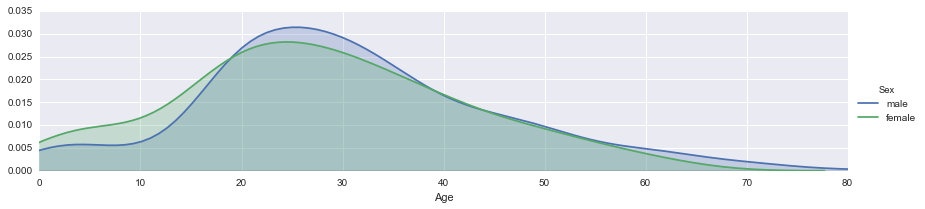

In [21]:
# Use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
# Use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

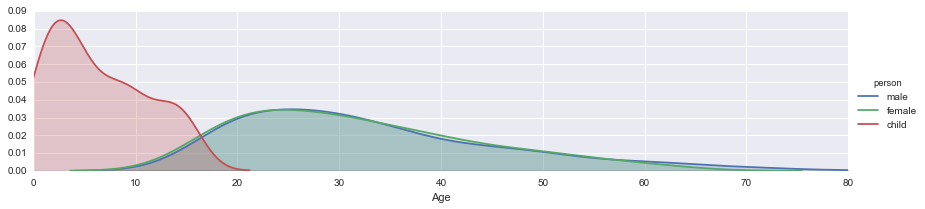

In [22]:
# We could have done the same thing for the 'person' column to include children in our analyses:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

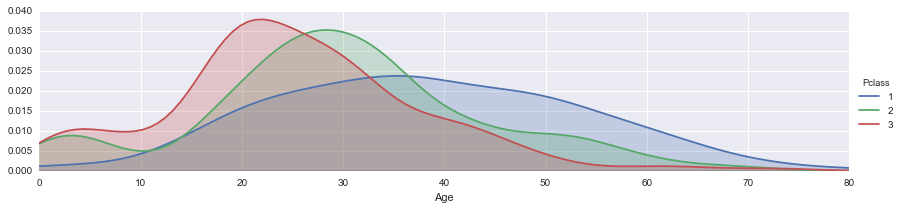

In [23]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Part 2: the distribution for deck where passengers were on.

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [25]:
# First we'll drop the NaN values and create a new object deck
deck = titanic_df['Cabin'].dropna()

In [26]:
# A preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

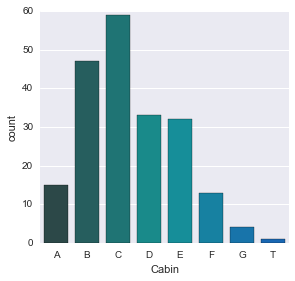

In [27]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df.sort_values(by='Cabin',ascending=True)
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

Notice that we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G). And here level 'T' is due to error thus we need to remove it.

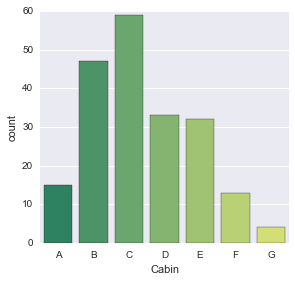

In [28]:
# Redefine cabin_df except where the row equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

Part 3: Visualized the distribution of the places where passengers come from.

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q, and S values. These letters stand for Cherbourg, Queenstown, Southhampton.

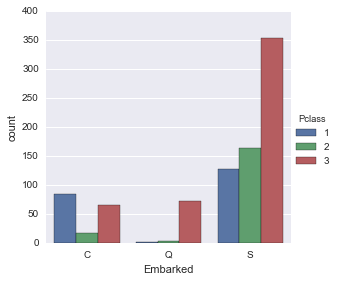

In [30]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind = 'count')

An interesting fact here is that in Queenstown, almost all the passengers that boarded there were 3rd class. And Southhampton seem to be a larger city than Cherburg and Queenstown at that time with more people boarded.

Another interesting question was: who was alone and who was with family?

In [31]:
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [32]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
# This is a warning, not an error

/Users/suruisun/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


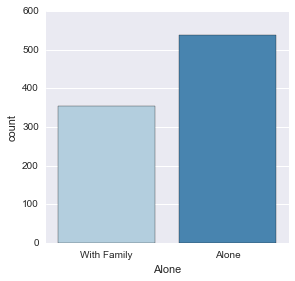

In [34]:
# Now visualize it by factorplot
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

Part 4: Find out the factors that help people survive the sinking.

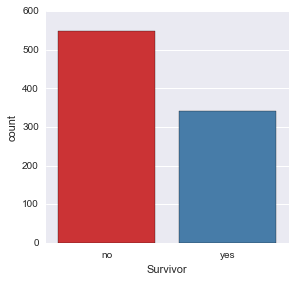

In [35]:
# Let's start by creating a new column for readability.
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

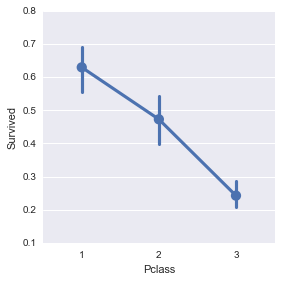

In [36]:
# Let's find out the survival rate for different class
sns.factorplot('Pclass','Survived',data=titanic_df)

It looks like that survival rates for the 3rd class are substantially lower! But notice there are far more male passengers in the 3rd class, maybe this effect is being caused by implementing the women and children first policy. Let's get a clearer picture on this.

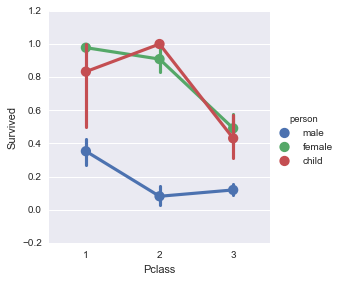

In [37]:
# Let's considering the effect of class and gender on survival rate
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. 

But what about age? Did being younger or older have an effect on survival rate?

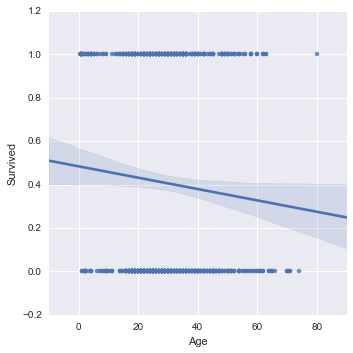

In [38]:
# Let's use a linear plot on age(x axis) versus survival(y axis)
sns.lmplot('Age','Survived',data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

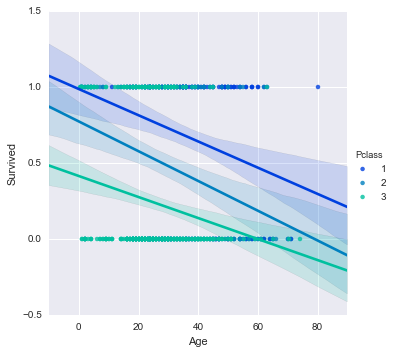

In [39]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

We can also use the x_bin argument to clean up this figure which is shown below.

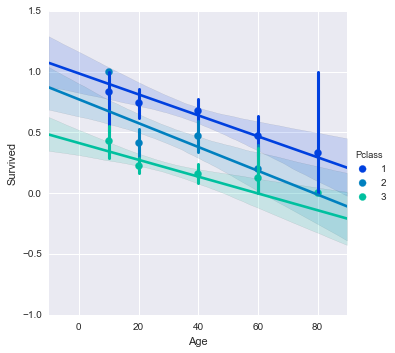

In [40]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

It showed that there is a trend for older people to have less survival rate among classes but the survival rate for people at the same age is decreasing from class 1 to class 3. 
And what about if we relate gender and age with the survival set?

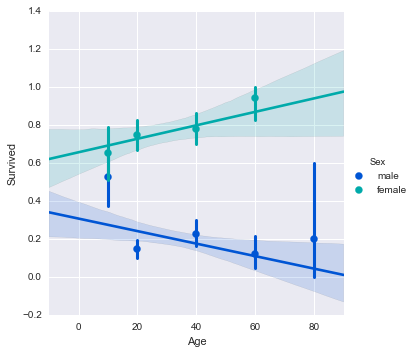

In [41]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

The result is intersting because the survival rate for women actually increase with age despite the fact that overall survival rate decrease with age.